In [3]:
%pip install numpy matplotlib


  Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (305 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
Using

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from dense import Dense
from activations import Tanh
from losses import mse, mse_prime
from network import train, predict

In [5]:
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

In [6]:
network = [
    Dense(2, 3),
    Tanh(),
    Dense(3, 1),
    Tanh()
]

In [7]:
# train
train(network, mse, mse_prime, X, Y, epochs=10000, learning_rate=0.1)


1/10000, error=0.49820095935639597
2/10000, error=0.49817341320404646
3/10000, error=0.49814493202811366
4/10000, error=0.4981154665362669
5/10000, error=0.4980849639046881
6/10000, error=0.49805336745708106
7/10000, error=0.49802061630818656
8/10000, error=0.4979866449671576
9/10000, error=0.4979513828954509
10/10000, error=0.4979147540130623
11/10000, error=0.4978766761459638
12/10000, error=0.49783706040645376
13/10000, error=0.49779581049677823
14/10000, error=0.4977528219247721
15/10000, error=0.4977079811183538
16/10000, error=0.49766116442342123
17/10000, error=0.49761223696695345
18/10000, error=0.4975610513638271
19/10000, error=0.4975074462418724
20/10000, error=0.4974512445548671
21/10000, error=0.49739225164729806
22/10000, error=0.49733025302753653
23/10000, error=0.4972650117972699
24/10000, error=0.4971962656741682
25/10000, error=0.49712372353131307
26/10000, error=0.49704706136016374
27/10000, error=0.49696591754287456
28/10000, error=0.4968798872934075
29/10000, error

In [8]:
# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

In [9]:
points = np.array(points)

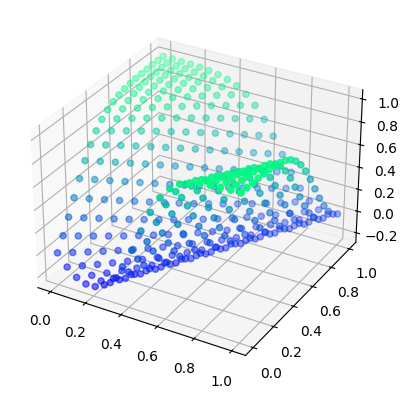

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()